# Text Analytics on Social Media scrapped data using Python

In [3]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
#import seaborn as sns
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [25]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = '0LIUs0unxXtfjkq4JSl30NTem'
CONSUMER_SECRET = 'wzIKLdyEE6tjvQ6UiWkOcsnKIumwiMZ6KbI4Ezj3grVMdaiu7o'

# Access:
ACCESS_TOKEN  = '187891164-K0T35QJO7cP5PjoOOQqGsvahcrtAeUSzkZ693rXJ'
ACCESS_SECRET = 'PiHugLphtxokQU2arhlHMLUm1qSkxP2iOx51fyUMe6Tg2'

In [26]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [7]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="@narendramodi", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

It was good interacting with my sisters and brothers of Maharashtra during programmes at Yavatmal and Dhule. 

Here… https://t.co/REBIvpbSv8

Improving irrigation and connectivity in Maharashtra. https://t.co/u2vBhj7rOo

Enhancing education, housing and financial inclusion for the poor. https://t.co/vt0vas5Axp

We salute you, brave sons of Mother India. 

You lived for the nation and served the country with unparalleled valo… https://t.co/UxsjSNFENs

A grateful nation bows to the martyrs of Pulwama. 

A befitting reply will be given to the perpetrators of the hein… https://t.co/CwK5g2rMOx



In [27]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,It was good interacting with my sisters and br...
1,Improving irrigation and connectivity in Mahar...
2,"Enhancing education, housing and financial inc..."
3,"We salute you, brave sons of Mother India. \n\..."
4,A grateful nation bows to the martyrs of Pulwa...
5,"India gets the first Semi High Speed Train, 'V..."
6,Spoke to Home Minister Rajnath Singh Ji and ot...
7,Attack on CRPF personnel in Pulwama is despica...
8,Greetings to @SushmaSwaraj Ji on her birthday....
9,Productivity of the 16th Lok Sabha is exceptio...


In [28]:
# metadata of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [29]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1096753823211606017
2019-02-16 12:51:02
Twitter Web Client
1849
409
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/REBIvpbSv8', 'expanded_url': 'https://twitter.com/i/web/status/1096753823211606017', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [30]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [12]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,It was good interacting with my sisters and br...,140,1096753823211606017,2019-02-16 12:51:02,Twitter Web Client,1849,409
1,Improving irrigation and connectivity in Mahar...,77,1096719469676621824,2019-02-16 10:34:32,Periscope,9546,2451
2,"Enhancing education, housing and financial inc...",90,1096653689467461632,2019-02-16 06:13:09,Periscope,22819,5563
3,"We salute you, brave sons of Mother India. \n\...",140,1096446425276153856,2019-02-15 16:29:33,Twitter for iPhone,134985,34712
4,A grateful nation bows to the martyrs of Pulwa...,140,1096293506048380928,2019-02-15 06:21:54,Twitter Media Studio,93462,28417
5,"India gets the first Semi High Speed Train, 'V...",91,1096279779857227778,2019-02-15 05:27:22,Periscope,34325,9549
6,Spoke to Home Minister Rajnath Singh Ji and ot...,125,1096036001540173825,2019-02-14 13:18:40,Twitter for Android,88083,19564
7,Attack on CRPF personnel in Pulwama is despica...,139,1096035566670565376,2019-02-14 13:16:57,Twitter for Android,127343,41802
8,Greetings to @SushmaSwaraj Ji on her birthday....,140,1095893168392945664,2019-02-14 03:51:06,Twitter for iPhone,48425,9165
9,Productivity of the 16th Lok Sabha is exceptio...,139,1095732005818519552,2019-02-13 17:10:42,Twitter for iPhone,31145,8144


In [31]:
# We extract the mean of length:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 124.785


In [32]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]


In [33]:
# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
We salute you, brave sons of Mother India. 

You lived for the nation and served the country with unparalleled valo… https://t.co/UxsjSNFENs
Number of likes: 134985
140 characters.

The tweet with more retweets is: 
Attack on CRPF personnel in Pulwama is despicable. I strongly condemn this dastardly attack. The sacrifices of our… https://t.co/QaTBqQrojk
Number of retweets: 41802
139 characters.



In [16]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web Client
* Periscope
* Twitter for iPhone
* Twitter Media Studio
* Twitter for Android


In [17]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

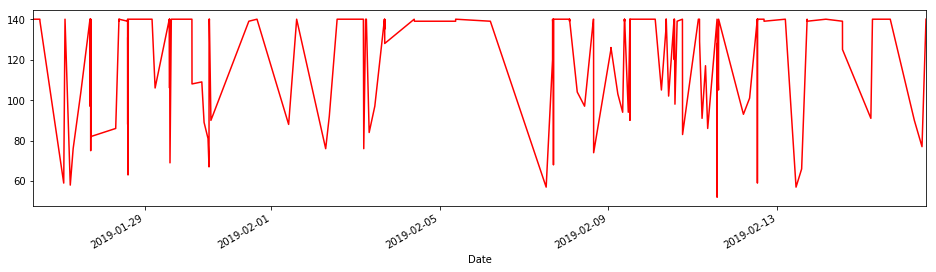

In [18]:
# lengths along time:
tlen.plot(figsize=(16,4), color='r')

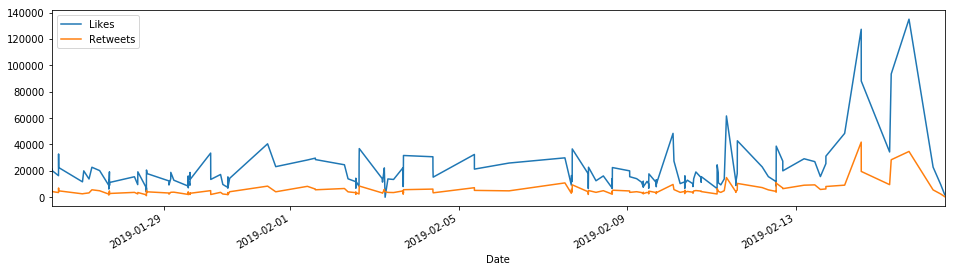

In [19]:
# Likes vs retweets visual:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

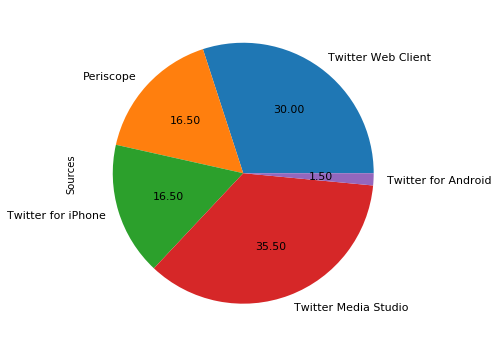

In [34]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [21]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [35]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,It was good interacting with my sisters and br...,140,1096753823211606017,2019-02-16 12:51:02,Twitter Web Client,1849,409,1
1,Improving irrigation and connectivity in Mahar...,77,1096719469676621824,2019-02-16 10:34:32,Periscope,9546,2451,0
2,"Enhancing education, housing and financial inc...",90,1096653689467461632,2019-02-16 06:13:09,Periscope,22819,5563,-1
3,"We salute you, brave sons of Mother India. \n\...",140,1096446425276153856,2019-02-15 16:29:33,Twitter for iPhone,134985,34712,1
4,A grateful nation bows to the martyrs of Pulwa...,140,1096293506048380928,2019-02-15 06:21:54,Twitter Media Studio,93462,28417,0
5,"India gets the first Semi High Speed Train, 'V...",91,1096279779857227778,2019-02-15 05:27:22,Periscope,34325,9549,1
6,Spoke to Home Minister Rajnath Singh Ji and ot...,125,1096036001540173825,2019-02-14 13:18:40,Twitter for Android,88083,19564,1
7,Attack on CRPF personnel in Pulwama is despica...,139,1096035566670565376,2019-02-14 13:16:57,Twitter for Android,127343,41802,1
8,Greetings to @SushmaSwaraj Ji on her birthday....,140,1095893168392945664,2019-02-14 03:51:06,Twitter for iPhone,48425,9165,1
9,Productivity of the 16th Lok Sabha is exceptio...,139,1095732005818519552,2019-02-13 17:10:42,Twitter for iPhone,31145,8144,1


In [23]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [24]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 43.0%
Percentage of neutral tweets: 46.5%
Percentage de negative tweets: 10.5%
